# 0.0 Imports

## 0.1 Importing libraries

In [1]:
import pandas as pd
import numpy  as np

from sklearn           import metrics      as mt
from sklearn           import linear_model as lm
from sklearn           import ensemble     as en
from sklearn           import tree        as tr
from matplotlib        import pyplot     as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics   import roc_curve, auc

## 0.2 Creating Result Lists

In [138]:
algorithm = ['KNN', 'Decision Tree', 'Random Forest', "Logistic Regression"]
acc_list_train = []
prec_list_train = []
rec_list_train = []
f1_list_train = []

acc_list_val = []
prec_list_val = []
rec_list_val = []
f1_list_val = []

acc_list_test = []
prec_list_test = []
rec_list_test = []
f1_list_test = []

# 1.0 Load Datasets

In [2]:
#Training Data
X_training = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Class_X_training.csv' )
y_training = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Class_y_training.csv')

#Validation Data
X_val = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Class_X_validation.csv')
y_val = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Class_y_validation.csv')

#Test Data
X_test = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Class_X_test.csv')
y_test = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Class_y_test.csv')

## 1.1 Classes Distribution Analyses

In [3]:
y_training.value_counts()

0
0    41087
1    31428
Name: count, dtype: int64

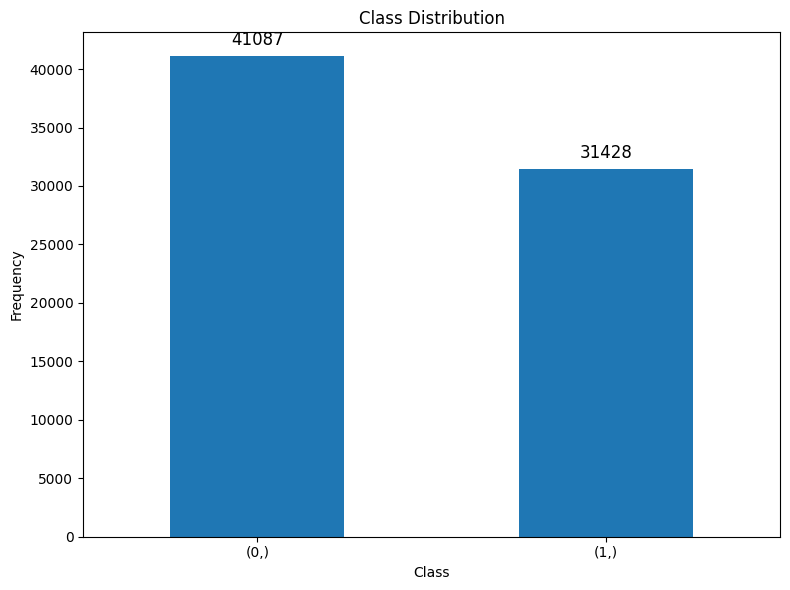

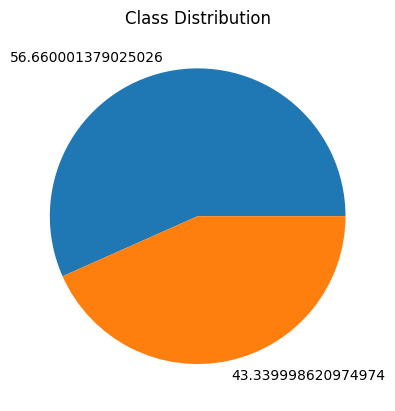

In [43]:
class_counts = y_training.value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = class_counts.plot(kind='bar')

# Adicionar os valores de y acima de cada barra
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=12, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Definir título e rótulos dos eixos
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
#=====================================

y_aux = y_training.copy()
y_aux['count'] = ''
cols = ['0', 'count']
y_aux = y_aux.loc[:, cols].groupby('0').count().reset_index()
y_aux['porcentagem'] = ''
y_aux['porcentagem'] = y_aux['count'] / y_aux['count'].sum()
# Criando o gráfico de pizza
plt.pie(y_aux['porcentagem'], labels=y_aux['porcentagem']*100)
plt.title('Class Distribution')  # Título do gráfico
plt.show()  # Mostra o gráfico

In [7]:
y_aux

,0,count,porcentagem
0,0,41087,0.5666
1,1,31428,0.4334


Este dataset demosntrou um leve desiquilibrio entre as classes (56% vs. 43%), 
portanto métricas de avaliação utlizadas para encontrar os melhores parametros será a F1-Score, pois fornecere uma visão equilibrada da performance do modelo, 
levando em consideração tanto a precision quanto a recall. 

In [5]:
# Acessando as linhas filtradas e a primeira coluna (índice 0)
# y_training.loc[y_training.iloc[:, 0] == 1, y_training.columns[0]].count()

31428

# 2.0 Machine Learning Algorithm Training 

## 2.1 KNN

### 2.1.1 Default Training

In [44]:
# 1.Definition
knn_classifier = KNeighborsClassifier()

# 2.Training
knn_classifier.fit(X_training, y_training)

# 3.Predict
y_pred = knn_classifier.predict( X_training )

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [90]:
# Accuracy Dados de Treino
acuracia_training = mt.accuracy_score( y_training, y_pred )
print(f"Acurácia sobre os dados de treino: {acuracia_training}%")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, y_pred)
print(f"Recall Training: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, y_pred )
print( "F1 Score: {}".format( f1_train ) )


Acurácia sobre os dados de treino: 0.8321864441839619%
Recall Training: 0.7974099529082347
F1 Score: 0.8046427252733139


### 2.1.2 Teste sobre os dados de validação

In [47]:
yval_pred = knn_classifier.predict( X_val )
# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yval_pred )
print(f"Acurácia sobre os dados de validação: {acuracia_val}%")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yval_pred)
print(f"Recall Validação: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yval_pred )
print( "F1 Score: {}".format( f1_val ) )

Acurácia sobre os dados de validação: 0.6756652401943435%
Recall Validação: 0.6031628183235578
F1 Score: 0.6171376481312671


### 2.1.3 Finding the best k-value

In [ ]:
#Descobrindo  o melhor valor de k

k = np.arange( 2, 9, 1)
f1_list = []

for i in k:
    # 1.Definition
    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    # 2.Training
    knn_classifier.fit(X_training, y_training)

    # 3.Predict
    yval_pred = knn_classifier.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yval_pred )
    f1_list.append(f1_val)


Text(0, 0.5, 'F1-Score')

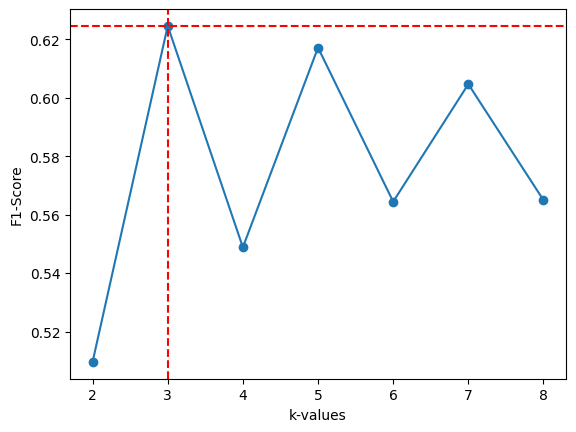

In [81]:
# Plotando o melhor valor de K
max_f1 = max(f1_list)

plt.plot(k, f1_list, marker='o')
plt.axvline(x=3, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('k-values')
plt.ylabel('F1-Score')

O k=3 demonstrou uma melhor performance em prever as classificações sobre os dados de validação.

### 2.1.4 Concatenating training + validation datasets

In [39]:
X = pd.concat([X_training, X_val], ignore_index=True)
y = pd.concat([y_training, y_val], ignore_index=True)

### 2.1.4 Training with best parameters

In [139]:
# 1.Definition
k=3
knn_classifier_final = KNeighborsClassifier(n_neighbors=k)

# 2.Training
knn_classifier_final.fit(X, y)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### 2.1.5 Performance

#### 2.1.5.1 Scores over training data

In [140]:
yhat_train = knn_classifier_final.predict( X_training )

# Scores over training data
accuracy_train = mt.accuracy_score( y_training, yhat_train )
print(f"Acurácia sobre os dados de treino: {accuracy_train}%")

precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision Treino: {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall Training: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score: {}".format( f1_train ) )

Acurácia sobre os dados de treino: 0.8429566296628284%
Precision Treino: 0.8227676845767298
Recall Training: 0.8127147766323024
F1 Score: 0.8177103342297349


In [141]:
# Add values on the lists

acc_list_train.append(accuracy_train)
prec_list_train.append(precision_train)
rec_list_train.append(recall_train)
f1_list_train.append(f1_train)

#### 2.1.5.1 Scores over validation data

In [157]:
yhat_val = knn_classifier_final.predict( X_val )

# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yhat_val )
print(f"Accuracy over validation data: {acuracia_val}")

# Precision Dados de Validação
precision_val = mt.precision_score( y_val, yhat_val)
print(f"Precision over validation data: {precision_val}")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yhat_val)
print(f"Recall over validation data: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yhat_val )
print( "F1 Score over validation data: {}".format( f1_val ) )


Accuracy over validation data: 0.8435921361691174
Precision over validation data: 0.8196197831575821
Recall over validation data: 0.8194372262231792
F1 Score over validation data: 0.8195284945238537


In [158]:
# Add values on the lists

acc_list_val.append(acuracia_val)
prec_list_val.append(precision_val)
rec_list_val.append(recall_val)
f1_list_val.append(f1_val)

#### 2.1.5.1 Scores over test data

In [168]:
yhat_test = knn_classifier_final.predict( X_test )

# Accuracy Dados de Teste 
acuracia_test = mt.accuracy_score( y_test, yhat_test )
print(f"Accuracy over testing data: {acuracia_test}")

# Precision Dados de Teste
precision_test = mt.precision_score( y_test, yhat_test)
print(f"Precision over testing data: {precision_test}")
# Recall dos Dados de Teste
recall_test = mt.recall_score( yhat_test, y_test)
print(f"Recall over testing data: {recall_test}")

# F1 score Dados de Teste
f1_test = mt.f1_score( y_test, yhat_test )
print( "F1 Score over testing data: {}".format( f1_test ) )


Accuracy over testing data: 0.6884486154559147
Precision over testing data: 0.6480251346499102
Recall over testing data: 0.6480251346499102
F1 Score over testing data: 0.6415463230393246


In [169]:
# Add values on the lists

acc_list_test.append(acuracia_test)
prec_list_test.append(precision_test)
rec_list_test.append(recall_test)
f1_list_test.append(f1_test)

## 2.2 Decision Tree

### 2.2.1 Default Training

In [3]:
# 1. Define Model
model_tree_default = tr.DecisionTreeClassifier()

# 2. Training
model_tree_default.fit( X_training, y_training)

# 3. Prediction
yhat_train = model_tree_default.predict( X_training )

In [4]:
# Accuracy Dados de Treino
acc_train = mt.accuracy_score( y_training, yhat_train )
print(f"Accuracy Training (default parameters): {acc_train}")

# Precision Dados de Treino
precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision Training  (default parameters): {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall Training  (default parameters): {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score  (default parameters): {}".format( f1_train ) )

Accuracy Training (default parameters): 1.0
Precision Training  (default parameters): 1.0
Recall Training  (default parameters): 1.0
F1 Score  (default parameters): 1.0


### 2.2.2 Test on the validation set

In [5]:
yval_pred = model_tree_default.predict( X_val )

# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yval_pred )
print(f"Acurácia sobre os dados de validação: {acuracia_val}%")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yval_pred)
print(f"Recall Validação: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yval_pred )
print( "F1 Score: {}".format( f1_val ) )

Acurácia sobre os dados de validação: 0.9459120306316162%
Recall Validação: 0.93897097037642
F1 Score: 0.9376830398517145


### 2.2.3 Finding the best max_depth value

In [143]:
#Descobrindo  o melhor valor de max_depth

max_depth = np.arange( 1, 50, 1)
f1_list = []

for i in max_depth:
    # 1.Definition
    model_tree = tr.DecisionTreeClassifier(max_depth=i)

    # 2.Training
    model_tree.fit(X_training, y_training)

    # 3.Predict
    yval_pred = model_tree.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yval_pred )
    f1_list.append(f1_val)


Text(0, 0.5, 'F1-Score')

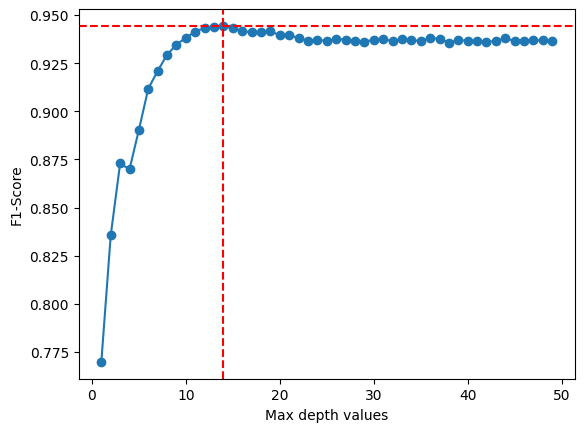

In [145]:
# Plotando o melhor valor de Max Depth
max_f1 = max(f1_list)

plt.plot(max_depth, f1_list, marker='o')
plt.axvline(x=14, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max depth values')
plt.ylabel('F1-Score')

The best max_value parameters found is 14

### 2.2.4 Training with the best parameter

In [143]:
# 1.Definition
model_tree_final = tr.DecisionTreeClassifier(max_depth=14)

# 2.Training
model_tree_final.fit(X, y)

DecisionTreeClassifier(max_depth=14)

### 2.2.5 Performance

#### 2.2.4.1 Scores over training data

In [145]:
yhat_train = model_tree_final.predict( X_training )

# Scores over training data
accuracy_train = mt.accuracy_score( y_training, yhat_train )
print(f"Accuracy over training data: {accuracy_train}%")

precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision over training data: {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall over training data: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score over training data: {}".format( f1_train ) )

Accuracy over training data: 0.9724608701647935%
Precision over training data: 0.975783245497753
Recall over training data: 0.9602901870943108
F1 Score over training data: 0.9679747261734849


In [146]:
# Add values on the lists

acc_list_train.append(accuracy_train)
prec_list_train.append(precision_train)
rec_list_train.append(recall_train)
f1_list_train.append(f1_train)

#### 2.2.4.2 Scores over validation data

In [159]:
yhat_val = model_tree_final.predict( X_val )

# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yhat_val )
print(f"Accuracy over validation data: {acuracia_val}")

# Precision Dados de Validação
precision_val = mt.precision_score( y_val, yhat_val)
print(f"Precision over validation data: {precision_val}")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yhat_val)
print(f"Recall over validation data: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yhat_val )
print( "F1 Score over validation data: {}".format( f1_val ) )


Accuracy over validation data: 0.9736156246983494
Precision over validation data: 0.9790199197152163
Recall over validation data: 0.959685203058876
F1 Score over validation data: 0.9692561487702459


In [160]:
# Add values on the lists

acc_list_val.append(acuracia_val)
prec_list_val.append(precision_val)
rec_list_val.append(recall_val)
f1_list_val.append(f1_val)

#### 2.2.4.3 Scores over test data

In [170]:
yhat_test = model_tree_final.predict( X_test )

# Accuracy Dados de Teste 
acuracia_test = mt.accuracy_score( y_test, yhat_test )
print(f"Accuracy over testing data: {acuracia_test}")

# Precision Dados de Teste
precision_test = mt.precision_score( y_test, yhat_test)
print(f"Precision over testing data: {precision_test}")
# Recall dos Dados de Teste
recall_test = mt.recall_score( yhat_test, y_test)
print(f"Recall over testing data: {recall_test}")

# F1 score Dados de Teste
f1_test = mt.f1_score( y_test, yhat_test )
print( "F1 Score over testing data: {}".format( f1_test ) )



Accuracy over testing data: 0.9563974819449272
Precision over testing data: 0.9569642857142857
Recall over testing data: 0.9569642857142857
F1 Score over testing data: 0.949966762685575


In [171]:
# Add values on the lists

acc_list_test.append(acuracia_test)
prec_list_test.append(precision_test)
rec_list_test.append(recall_test)
f1_list_test.append(f1_test)

## 2.3 Random Forest

### 2.3.1 Dafult Training

In [6]:
# Definition
model_random_forest_default = en.RandomForestClassifier()

# Training/Fit
model_random_forest_default.fit(X_training, y_training)

# Performance
yhat_train = model_random_forest_default.predict(X_training)

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [7]:
# Accuracy Dados de Treino
acc_train = mt.accuracy_score( y_training, yhat_train )
print(f"Accuracy Training (default parameters): {acc_train}")

# Precision Dados de Treino
precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision Training  (default parameters): {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall Training  (default parameters): {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score  (default parameters): {}".format( f1_train ) )

Accuracy Training (default parameters): 1.0
Precision Training  (default parameters): 1.0
Recall Training  (default parameters): 1.0
F1 Score  (default parameters): 1.0


### 2.3.2 Testing on validation set

In [8]:
yval_pred = model_random_forest_default.predict( X_val )

# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yval_pred )
print(f"Accuracy Validation (default parameters): {acuracia_val}%")

# Precision Dados de Treino
precision_train = mt.precision_score( y_val, yval_pred)
print(f"Precision Validation  (default parameters): {precision_train}")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yval_pred)
print(f"Recall Validation (default parameters): {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yval_pred )
print( "F1 Score Validation (default parameters): {}".format( f1_val ) )

Accuracy Validation (default parameters): 0.9650246146915924%
Precision Validation  (default parameters): 0.9744788473329246
Recall Validation (default parameters): 0.9440196005642587
F1 Score Validation (default parameters): 0.9590074291963646


### 2.3.3 Finding the best parameters

#### 2.3.3.1 Finding the best max_depth value

In [ ]:
#Descobrindo  o melhor valor de max_depth

max_depth = np.arange( 20, 50, 1)
f1_list = []

for i in max_depth:
    # 1.Definition
    model_random_forest = en.RandomForestClassifier(max_depth=i, random_state=42)

    # 2.Training
    model_random_forest.fit(X_training, y_training)

    # 3.Predict
    yval_pred = model_random_forest.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yval_pred )
    f1_list.append(f1_val)


Text(0, 0.5, 'F1-Score')

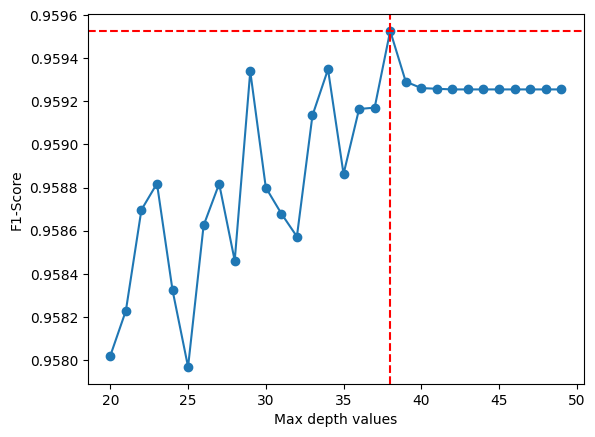

In [21]:
# Plotando o melhor valor de Max Depth
max_f1 = max(f1_list)

plt.plot(max_depth, f1_list, marker='o')
plt.axvline(x=38, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max depth values')
plt.ylabel('F1-Score')

#### 2.3.3.2 Finding the best n_estimators value

In [ ]:
#Descobrindo  o melhor valor de n_estimator

max_depth = 38
n_estimators= np.arange(70, 100, 1)
f1_list = []

for i in n_estimators:
    # 1.Definition
    model_random_forest = en.RandomForestClassifier(max_depth=max_depth, n_estimators=i, random_state=42)

    # 2.Training
    model_random_forest.fit(X_training, y_training)

    # 3.Predict
    yval_pred = model_random_forest.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yval_pred )
    f1_list.append(f1_val)


Text(0, 0.5, 'F1-Score')

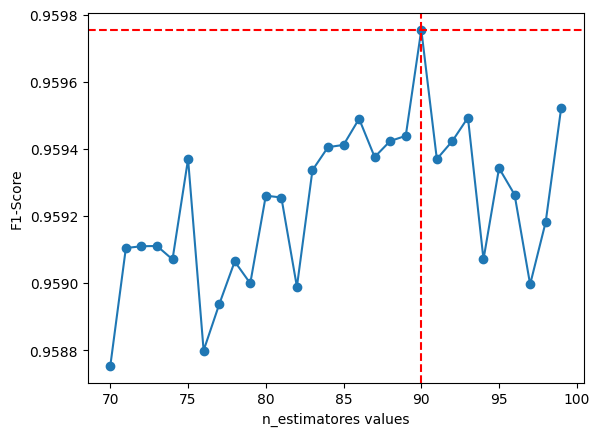

In [35]:
# Plotando o melhor valor de n_estimators
max_f1 = max(f1_list)

plt.plot(n_estimators, f1_list, marker='o')
plt.axvline(x=90, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('n_estimators values')
plt.ylabel('F1-Score')

In [34]:
max(f1_list)

0.9597558218403799

#### 2.3.3. Checking the max_depth possible values with the best n_estimators

In [ ]:
max_depth = np.arange( 20, 50, 1)
n_estimators= 90
f1_list = []

for i in max_depth:
    # 1.Definition
    model_random_forest = en.RandomForestClassifier(max_depth=i, n_estimators=n_estimators, random_state=42)

    # 2.Training
    model_random_forest.fit(X_training, y_training)

    # 3.Predict
    yval_pred = model_random_forest.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yval_pred )
    f1_list.append(f1_val)


Text(0, 0.5, 'F1-Score')

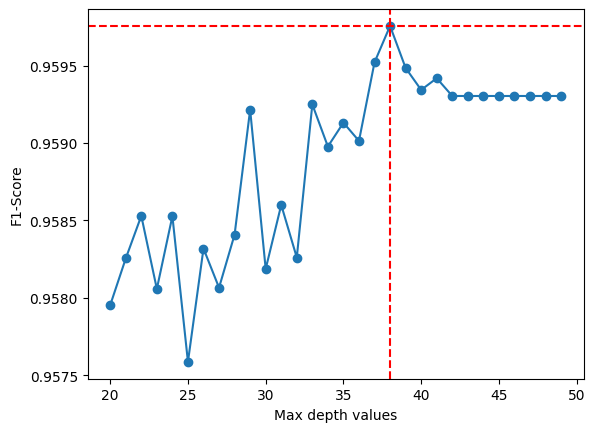

In [37]:
# Plotando o melhor valor de Max Depth
max_f1 = max(f1_list)

plt.plot(max_depth, f1_list, marker='o')
plt.axvline(x=38, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max depth values')
plt.ylabel('F1-Score')

### 2.3.4 Training with Best parameters

In [147]:
# Definition
model_random_forest = en.RandomForestClassifier(max_depth=38, n_estimators=90, random_state=42)

# Training/Fit
model_random_forest.fit(X, y)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=38, n_estimators=90, random_state=42)

### 2.3.5 Performance

#### 2.3.5.1 Performance over training set

In [149]:
yhat_train = model_random_forest.predict( X_training )

# Scores over training data
accuracy_train = mt.accuracy_score( y_training, yhat_train )
print(f"Accuracy over training set: {accuracy_train}")

precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision over training set: {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall over traning set: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score over traning set: {}".format( f1_train ) )

Accuracy over training set: 1.0
Precision over training set: 1.0
Recall over traning set: 1.0
F1 Score over traning set: 1.0


In [150]:
# Add values on the lists

acc_list_train.append(accuracy_train)
prec_list_train.append(precision_train)
rec_list_train.append(recall_train)
f1_list_train.append(f1_train)

#### 2.3.5.2 Performance over validation set

In [161]:
yhat_val = model_random_forest.predict( X_val )

# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yhat_val )
print(f"Accuracy over validation data: {acuracia_val}")

# Precision Dados de Validação
precision_val = mt.precision_score( y_val, yhat_val)
print(f"Precision over validation data: {precision_val}")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yhat_val)
print(f"Recall over validation data: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yhat_val )
print( "F1 Score over validation data: {}".format( f1_val ) )


Accuracy over validation data: 1.0
Precision over validation data: 1.0
Recall over validation data: 1.0
F1 Score over validation data: 1.0


In [162]:
# Add values on the lists

acc_list_val.append(acuracia_val)
prec_list_val.append(precision_val)
rec_list_val.append(recall_val)
f1_list_val.append(f1_val)

#### 2.3.5.3 Performance over test set

In [172]:
yhat_test = model_random_forest.predict( X_test )

# Accuracy Dados de Teste 
acuracia_test = mt.accuracy_score( y_test, yhat_test )
print(f"Accuracy over testing data: {acuracia_test}")

# Precision Dados de Teste
precision_test = mt.precision_score( y_test, yhat_test)
print(f"Precision over testing data: {precision_test}")
# Recall dos Dados de Teste
recall_test = mt.recall_score( yhat_test, y_test)
print(f"Recall over testing data: {recall_test}")

# F1 score Dados de Teste
f1_test = mt.f1_score( y_test, yhat_test )
print( "F1 Score over testing data: {}".format( f1_test ) )


Accuracy over testing data: 0.9645850229791836
Precision over testing data: 0.9732741438666425
Recall over testing data: 0.9732741438666425
F1 Score over testing data: 0.9590679819667008


In [173]:
# Add values on the lists

acc_list_test.append(acuracia_test)
prec_list_test.append(precision_test)
rec_list_test.append(recall_test)
f1_list_test.append(f1_test)

#### 2.3.5.4 Curva ROC

In [44]:
# faz-se o predict_proba

yhat_val_prob = model_random_forest.predict_proba(X_val)
yhat_val_prob = yhat_val_prob[:, 1]

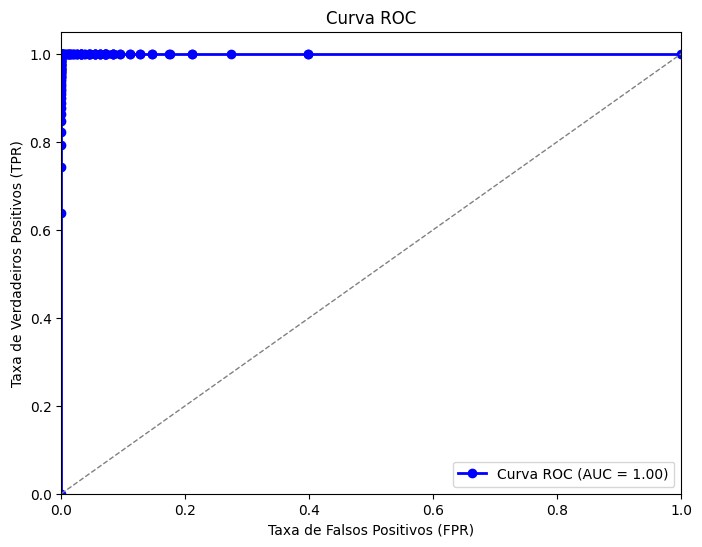

In [45]:
fpr, tpr, th = mt.roc_curve(y_val, yhat_val_prob)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, marker='o',label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # linha de referência (aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#AUC igual a 1 indica um bom modelo.

## 2.4 Logistic Regression

### 2.4.1 Default Training

In [72]:
# define
model_lr_default = lm.LogisticRegression(random_state=42)

# training
model_lr_default.fit(X_training, y_training)

# Predict
yhat_train = model_lr_default.predict( X_training )

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# Accuracy Dados de Treino
acuracia_training = mt.accuracy_score( y_training, yhat_train )
print(f"Acurácia sobre os dados de treino: {acuracia_training}")

# Precision Dados de Treino
precision_test = mt.precision_score( y_training, yhat_train)
print(f"Precision over traning data: {precision_test}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall Training: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score: {}".format( f1_train ) )


Acurácia sobre os dados de treino: 0.8726056677928704
Precision over traning data: 0.8609538681761988
Recall Training: 0.8420516736667939
F1 Score: 0.8513978702184474


### 2.4.2 Testing over validation set

In [74]:
# Predict
yhat_val = model_lr_default.predict( X_val )

In [75]:
# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yhat_val )
print(f"Acurácia sobre os dados de validação: {acuracia_val}%")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yhat_val)
print(f"Recall Validação: {recall_val}")

# Precision Dados de Validação
precision_test = mt.precision_score( y_val, yhat_val)
print(f"Precision over validation data: {precision_test}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yhat_val )
print( "F1 Score: {}".format( f1_val ) )

Acurácia sobre os dados de validação: 0.869976511470768%
Recall Validação: 0.8363649862647561
Precision over validation data: 0.8597923981071592
F1 Score: 0.8479169018855143


### 2.4.3 Fiding the best parameters

#### 2.4.3.1 Fiding the best solver

In [ ]:
#Descobrindo  o melhor valor de max_iter

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
f1_list = []

for i in solver:
    # 1. define
    model_lr = lm.LogisticRegression(solver=i, random_state=42)

    # 2. training
    model_lr.fit(X_training, y_training)

    # 3. Predict
    yval_pred = model_lr.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yval_pred )
    f1_list.append(f1_val)

Max f1-score: 0.8522331566994701


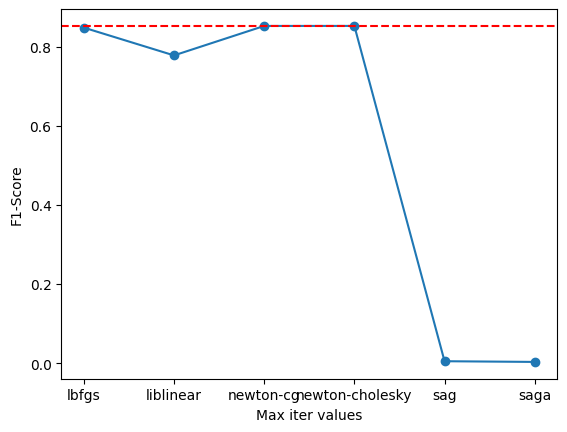

In [78]:
# Plotando o melhor valor de Max_iter
max_f1 = max(f1_list)

plt.plot(solver, f1_list, marker='o')
# plt.axvline(x=38, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max iter values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

newton-cholesky

#### 2.4.3.1 Finding the best max_iter value

##### 2.4.3.1 With solver='newton-cholesky'

In [127]:
#Descobrindo  o melhor valor de max_iter

max_iter = np.arange( 1, 10, 1)
f1_list = []

for i in max_iter:
    # 1. define
    model_lr = lm.LogisticRegression(max_iter= i, solver='newton-cholesky', random_state=42)

    # 2. training
    model_lr.fit(X_training, y_training)

    # 3. Predict
    yhat_train = model_lr.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yhat_train )
    f1_list.append(f1_val)

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:422: ConvergenceWarning: Newton solver did not converge after 1 iterations.
  warnings.warn(
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:422: ConvergenceWarning: Newton solve

Max f1-score: 0.8522331566994701


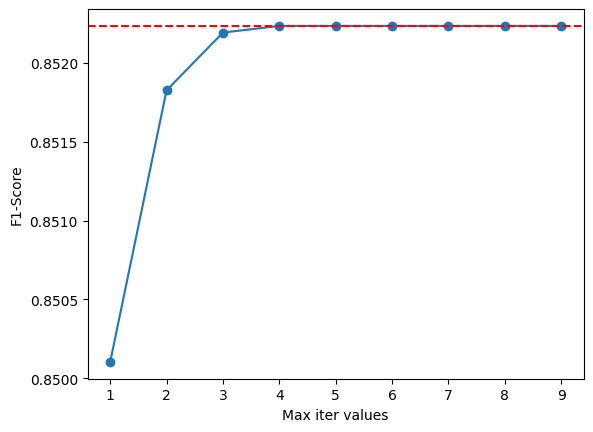

In [132]:
# Plotando o melhor valor de Max_iter e solver = 'newton-cholesky'

max_f1 = max(f1_list)
plt.plot(max_iter, f1_list, marker='o')
#plt.axvline(x=4, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max iter values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

Max f1-score: 0.8522331566994701


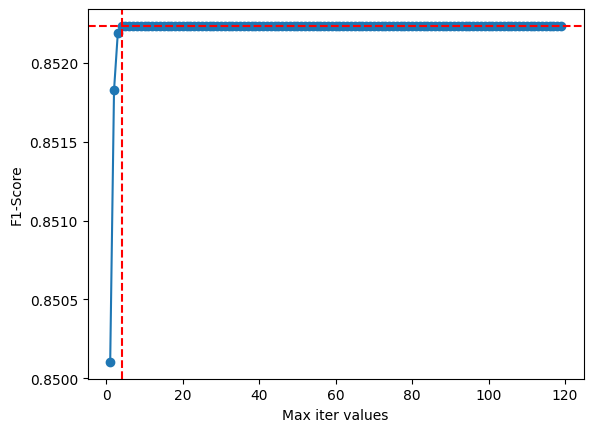

In [102]:
# Plotando o melhor valor de Max_iter e solver = 'newton-cholesky'

max_f1 = max(f1_list)
plt.plot(max_iter, f1_list, marker='o')
plt.axvline(x=4, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max iter values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

##### 2.4.3.1 With solver=default

In [ ]:
#Descobrindo  o melhor valor de max_iter  Default solver

max_iter = np.arange( 50, 200, 1)
f1_list = []

for i in max_iter:
    # 1. define
    model_lr = lm.LogisticRegression(max_iter= i, random_state=42)

    # 2. training
    model_lr.fit(X_training, y_training)

    # 3. Predict
    yhat_train = model_lr.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yhat_train )
    f1_list.append(f1_val)

Max f1-score: 0.8504275113940262


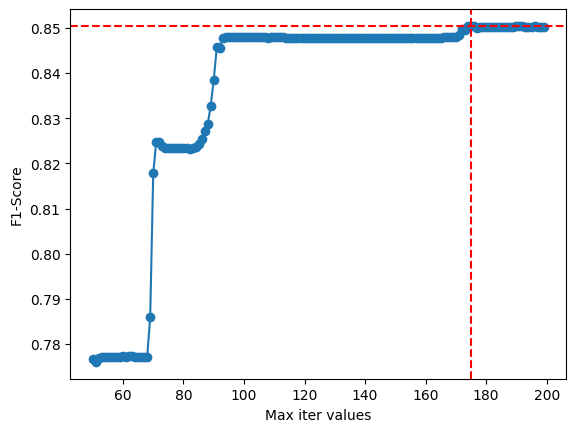

In [89]:
# Plotando o melhor valor de Max_iter Default solver
max_f1 = max(f1_list)

plt.plot(max_iter, f1_list, marker='o')
plt.axvline(x=175, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max iter values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

Max f1-score: 0.8479494793820246


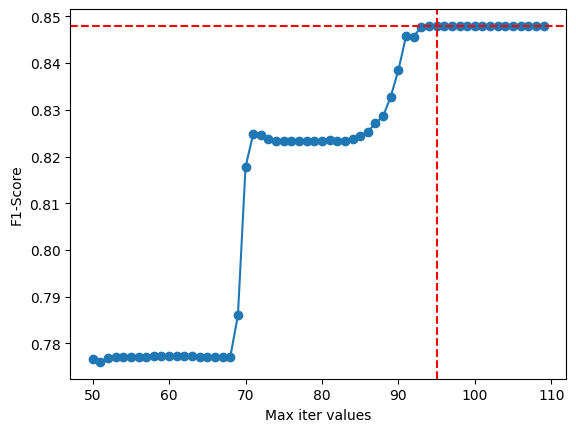

In [86]:
# Plotando o melhor valor de Max_iter Default
max_f1 = max(f1_list)

plt.plot(max_iter, f1_list, marker='o')
plt.axvline(x=95, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max iter values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

Max f1-score: 0.9593036400633055


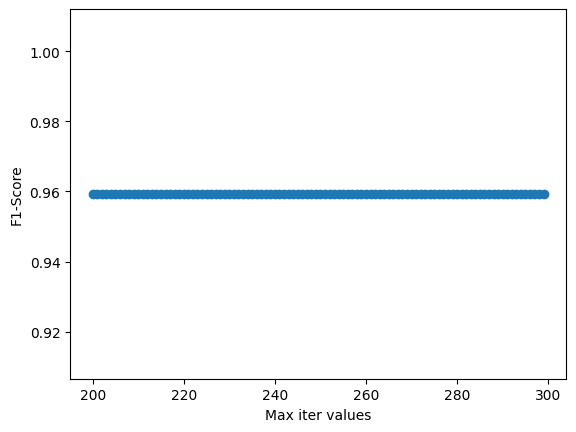

In [67]:
# Plotando o melhor valor de Max_iter
max_f1 = max(f1_list)

plt.plot(max_iter, f1_list, marker='o')
# plt.axvline(x=38, color='r', linestyle='--')
# plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('Max iter values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

In [100]:
# define
model_lr = lm.LogisticRegression(C=1,
                                 solver='lbfgs',
                                 max_iter=100)

# training
model_lr.fit(X_training, y_training)

# performance
yhat_train = model_lr.predict( X_training )

c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
# Accuracy Dados de Treino
acuracia_training = mt.accuracy_score( y_training, yhat_train )
print(f"Acurácia sobre os dados de treino: {acuracia_training}")

# Precision Dados de Treino
precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision Treino: {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall Training: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score: {}".format( f1_train ) )


Acurácia sobre os dados de treino: 0.8726056677928704
Precision Treino: 0.8609538681761988
Recall Training: 0.8420516736667939
F1 Score: 0.8513978702184474


In [102]:
# Accuracy Dados de Validação 
yhat_val = model_lr.predict( X_val )
acuracia_val = mt.accuracy_score( y_val, yhat_val )
print(f"Acurácia sobre os dados de validação: {acuracia_val}")

# Precision Dados de Validação
precision_val = mt.precision_score( y_val, yhat_val)
print(f"Precision Validação: {precision_val}")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yhat_val)
print(f"Recall Validação: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yhat_val )
print( "F1 Score: {}".format( f1_val ) )


Acurácia sobre os dados de validação: 0.869976511470768
Precision Validação: 0.8597923981071592
Recall Validação: 0.8363649862647561
F1 Score: 0.8479169018855143


In [103]:
# Accuracy Dados de Teste 
yhat_test = model_lr.predict( X_test )
acuracia_test = mt.accuracy_score( y_test, yhat_test )
print(f"Acurácia sobre os dados de Teste: {acuracia_test}")

# Precision Dados de Teste
precision_test = mt.precision_score( y_test, yhat_test)
print(f"Precision Treino: {precision_test}")

# Recall dos Dados de Teste
recall_test = mt.recall_score( yhat_test, y_test)
print(f"Recall teste: {recall_test}")

# F1 score Dados de Teste
f1_test = mt.f1_score( y_test, yhat_test )
print( "F1 Score: {}".format( f1_test ) )

Acurácia sobre os dados de Teste: 0.8687676205924381
Precision Treino: 0.8598139282810947
Recall teste: 0.8598139282810947
F1 Score: 0.8485469780709574


#### 2.4.3.3 Finding the best c value

##### 2.4.3.3.1 With solver ='newton-cholesky'

In [ ]:
#Descobrindo  o melhor valor de max_iter

c = np.arange( 1, 30, 1)
f1_list = []

for i in c:
    # 1. define
    model_lr = lm.LogisticRegression(C=i, max_iter= 5, solver='newton-cholesky', random_state=42)

    # 2. training
    model_lr.fit(X_training, y_training)

    # 3. Predict
    yhat_train = model_lr.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yhat_train )
    f1_list.append(f1_val)

Max f1-score: 0.852708483173714


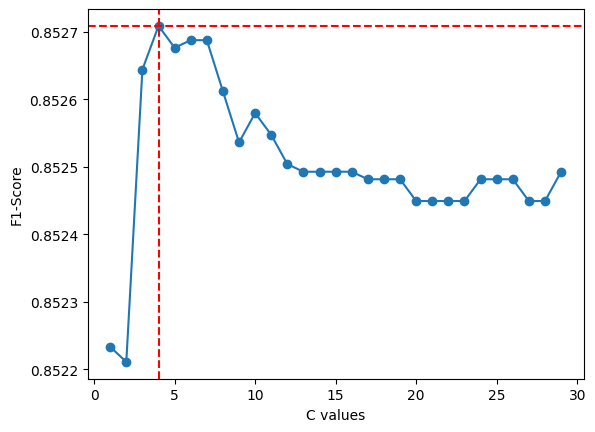

In [120]:
# Plotando o melhor valor de Max_iter Default solver
max_f1 = max(f1_list)

plt.plot(c, f1_list, marker='o')
plt.axvline(x=4, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('C values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

##### 2.4.3.3.2 With solver = deafult

In [ ]:
#Descobrindo  o melhor valor de max_iter

c = np.arange( 1, 50, 1)
f1_list = []

for i in c:
    # 1. define
    model_lr = lm.LogisticRegression(C=i, max_iter= 175, random_state=42)

    # 2. training
    model_lr.fit(X_training, y_training)

    # 3. Predict
    yhat_train = model_lr.predict( X_val )

    # 4. Performance
    f1_val = mt.f1_score( y_val, yhat_train )
    f1_list.append(f1_val)

Max f1-score: 0.8509000339635457


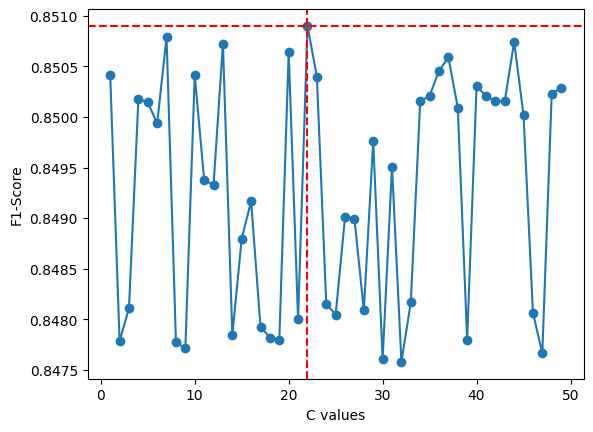

In [126]:
# Plotando o melhor valor de Max_iter Default solver
max_f1 = max(f1_list)

plt.plot(c, f1_list, marker='o')
plt.axvline(x=22, color='r', linestyle='--')
plt.axhline(y=max_f1, color='r', linestyle='--')
plt.xlabel('C values')
plt.ylabel('F1-Score')
print(f'Max f1-score: {max(f1_list)}')

### 2.4.4 Training with validation + training set with best parameters

In [151]:
# 1. Define
model_lr_final = lm.LogisticRegression(C=4, solver='newton-cholesky', max_iter=5, random_state=42)

# 2. Training
model_lr_final.fit(X, y)


c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Priscila Portela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:422: ConvergenceWarning: Newton solver did not converge after 5 iterations.
  warnings.warn(


LogisticRegression(C=4, max_iter=5, random_state=42, solver='newton-cholesky')

### 2.4.5 Performance

#### 2.4.5.1 Performance over the training set

In [152]:
yhat_train = model_lr_final.predict( X_training )

# Scores over training data
accuracy_train = mt.accuracy_score( y_training, yhat_train )
print(f"Accuracy over training set: {accuracy_train}")

precision_train = mt.precision_score( y_training, yhat_train)
print(f"Precision over training set: {precision_train}")

# Recall dos Dados de Treino
recall_train = mt.recall_score( y_training, yhat_train)
print(f"Recall over traning set: {recall_train}")

# F1 score Dados de Treino
f1_train = mt.f1_score( y_training, yhat_train )
print( "F1 Score over traning set: {}".format( f1_train ) )

Accuracy over training set: 0.8760532303661311
Precision over training set: 0.8714493809176985
Recall over traning set: 0.8375652284586993
F1 Score over traning set: 0.8541713989032028


In [153]:
# Add values on the lists

acc_list_train.append(accuracy_train)
prec_list_train.append(precision_train)
rec_list_train.append(recall_train)
f1_list_train.append(f1_train)

#### 2.4.5.2 Performance over the validation set

In [163]:
yhat_val = model_lr_final.predict( X_val )

# Accuracy Dados de Validação 
acuracia_val = mt.accuracy_score( y_val, yhat_val )
print(f"Accuracy over validation data: {acuracia_val}")

# Precision Dados de Validação
precision_val = mt.precision_score( y_val, yhat_val)
print(f"Precision over validation data: {precision_val}")

# Recall dos Dados de validação
recall_val = mt.recall_score( y_val, yhat_val)
print(f"Recall over validation data: {recall_val}")

# F1 score Dados de Validação
f1_val = mt.f1_score( y_val, yhat_val )
print( "F1 Score over validation data: {}".format( f1_val ) )


Accuracy over validation data: 0.8745133369799543
Precision over validation data: 0.8694879913506834
Recall over validation data: 0.835919518895241
F1 Score over validation data: 0.8523733817851465


In [164]:
# Add values on the lists

acc_list_val.append(acuracia_val)
prec_list_val.append(precision_val)
rec_list_val.append(recall_val)
f1_list_val.append(f1_val)

#### 2.4.5.3 Performance over the test set

In [174]:
yhat_test = model_lr_final.predict( X_test )

# Accuracy Dados de Teste 
acuracia_test = mt.accuracy_score( y_test, yhat_test )
print(f"Accuracy over testing data: {acuracia_test}")

# Precision Dados de Teste
precision_test = mt.precision_score( y_test, yhat_test)
print(f"Precision over testing data: {precision_test}")
# Recall dos Dados de Teste
recall_test = mt.recall_score( yhat_test, y_test)
print(f"Recall over testing data: {recall_test}")

# F1 score Dados de Teste
f1_test = mt.f1_score( y_test, yhat_test )
print( "F1 Score over testing data: {}".format( f1_test ) )


Accuracy over testing data: 0.8721276020546094
Precision over testing data: 0.8686378615891615
Recall over testing data: 0.8686378615891615
F1 Score over testing data: 0.8514513885773252


In [175]:
# Add values on the lists

acc_list_test.append(acuracia_test)
prec_list_test.append(precision_test)
rec_list_test.append(recall_test)
f1_list_test.append(f1_test)

# 3.0 Creating Performance Dataframes

In [182]:
# Add the performance values to the train, val and test dataframes

performance_table_train = pd.DataFrame({ 
    'Algorithm': algorithm,
    'Accuracy': acc_list_train,
    'Precision': prec_list_train,
    'Recall': rec_list_train,
    'F1-Score': f1_list_train
})

performance_table_val = pd.DataFrame({ 
    'Algorithm': algorithm,
    'Accuracy': acc_list_val,
    'Precision': prec_list_val,
    'Recall': rec_list_val,
    'F1-Score': f1_list_val
})

performance_table_test = pd.DataFrame({ 
    'Algorithm': algorithm,
    'Accuracy': acc_list_test,
    'Precision': prec_list_test,
    'Recall': rec_list_test,
    'F1-Score': f1_list_test
})

# Performance Results

In [186]:
performance_table_train

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,KNN,0.842957,0.822768,0.812715,0.817710
1,Decision Tree,0.972461,0.975783,0.960290,0.967975
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.876053,0.871449,0.837565,0.854171


In [187]:
performance_table_val

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,KNN,0.843592,0.819620,0.819437,0.819528
1,Decision Tree,0.973616,0.979020,0.959685,0.969256
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.874513,0.869488,0.835920,0.852373


In [188]:
performance_table_test

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,KNN,0.688449,0.648025,0.648025,0.641546
1,Decision Tree,0.956397,0.956964,0.956964,0.949967
2,Random Forest,0.964585,0.973274,0.973274,0.959068
3,Logistic Regression,0.872128,0.868638,0.868638,0.851451
